In [14]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [15]:
X = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])
y = np.array([[1], [1], [0], [0]])

In [16]:
num_input = 2
num_hidden = 2
num_output = 1

In [17]:
alfa = 0.01 # taxa de aprendizado
overfitting = 0
epoch = 100000
m = 4 # número de exemplos de treinamento

In [18]:
# Gerando os pesos
np.random.seed(1)
W1 = np.random.normal(0, 1, (num_hidden, num_input)) # 2x2
W2 = np.random.normal(0, 1, (num_output, num_hidden)) # 1x2

B1 = np.random.random((num_hidden, 1)) # 2x1
B2 = np.random.random((num_output, 1)) #1x1

In [19]:
# Função sigmoidal
def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z)) 

In [20]:
# Forward Propagation
def forward(x, predito = False):
    a1 = x.reshape(x.shape[0], 1) #obtendo o exemplo de treinamento
    
    z2 = W1.dot(a1) + B1
    a2 = sigmoid(z2)
    
    z3 = W2.dot(a2)
    a3 = sigmoid(z3)
    
    if predito: return a3
    return (a1, a2, a3)

In [21]:
# Inicializando as variáveis para o Gradiente

dW1 = 0
dW2 = 0

dB1 = 0
dB2 = 0

custo = np.zeros((epoch, 1))

In [22]:
# Função de treinamento
def treinamento(W_1, W_2, B_1, B_2): # Argumentos para evitar o UnboundLocalError
    for i in range(epoch):
        c = 0
        dW1 = 0
        dW2 = 0
        dB1 = 0
        dB2 = 0
        
        for j in range(m):            
            # Forward Propagation
            a0 = X[j].reshape(X[j].shape[0], 1)
            
            z1 = W_1.dot(a0) + B_1
            a1 = sigmoid(z1)
            
            z2 = W_2.dot(a1) + B_2
            a2 = sigmoid(z2)
            
            # Back Propagation
            dz2 = a2 - y[j]
            dW2 += dz2 * a1.T
            
            dz1 = np.multiply((W_2.T * dz2), sigmoid(a1, derv = True))
            dW1 += dz1.dot(a0.T)
            
            dB1 += dz1
            dB2 += dz2
            
            c += (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            
        W_1 = W_1 - alfa * (dW1 / m) + ((overfitting / m) * W1)
        W_2 = W_2 - alfa * (dW2 / m) + ((overfitting / m) * W2)
        
        B_1 = B_1 - alfa * (dB1 / m)
        B_2 = B_2 - alfa * (dB2 / m)
        
        custo[i] = (c / m) + (
        (overfitting / (2 * m)) *
        ( np.sum(np.power(W_1, 2)) + np.sum(np.power(W_2, 2))
        ))
    return (W_1, W_2, B_1, B_2)

In [23]:
# Testando
W1, W2, B1, B2 = treinamento(W1, W2, B1, B2)

<function matplotlib.pyplot.show>

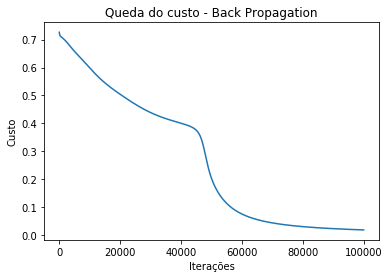

In [24]:
# Plotando
plt.plot(range(epoch), custo)
plt.title('Queda do custo - Back Propagation')
plt.xlabel('Iterações')
plt.ylabel('Custo')
plt.show